# THE SPARKS FOUNDATION - GRIP

## DATA SCIENCE AND BUSINESS ANALYTICS

## NAME: SMRUTHI

### TASK 1 : Prediction using supervised ML

###### Q) Predict the percentage of a student based on the no.of hours of study

In [6]:
#IMPORTING REQUIRED PACKAGES

In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [31]:
#IMPORTING THE DATASET

In [32]:
data = pd.read_csv("C://Users//smrut//Downloads//student_scores - student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
#PLOTTING THE DATA TO SEE IF THERE IS ANY RELATIONSHIP

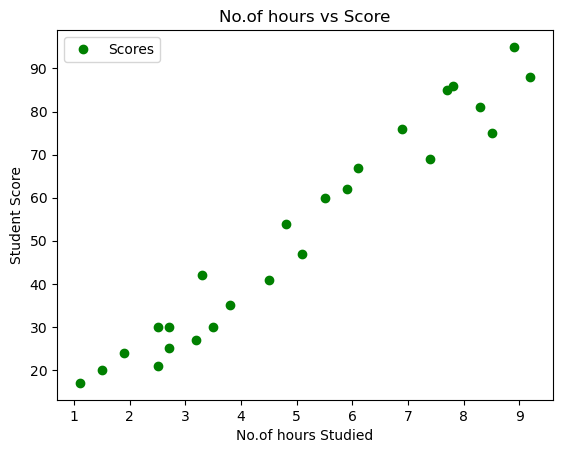

In [33]:
data.plot(x='Hours', y='Scores', style='o',color='g')  
plt.title('No.of hours vs Score')  
plt.xlabel('No.of hours Studied')  
plt.ylabel('Student Score')  
plt.show()

We can see that the no.of hours a student studies is directly proportional to the marks scored

In [46]:
#BUILDING A LINEAR REGRESSION MODEL

In [35]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 
model = LinearRegression()  




In [36]:
model.fit(x_train,y_train) 

LinearRegression()

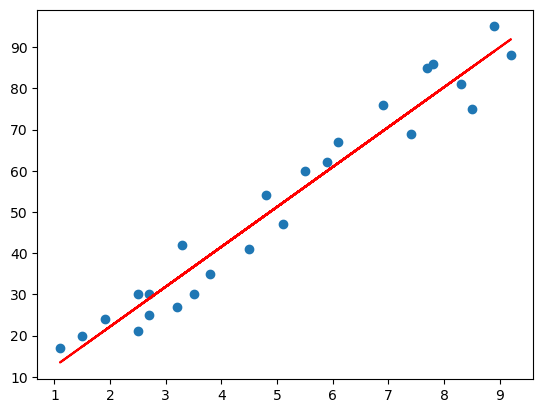

In [37]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color='r');
plt.show()

In [43]:
from scipy import stats
shapiro_wilks_test_statistic, shapiro_wilks_pvalue = stats.shapiro(data.loc[:, 'Scores'])

print("Shapiro Wilk's test result")
print("="*50)
print("Test Statistic:", shapiro_wilks_test_statistic)
print("P value:", shapiro_wilks_pvalue)

if shapiro_wilks_pvalue < 0.05:
    print("The data is normally distributed.")
else:
    print("The data is not normally distributed.")

print("="*50)

Shapiro Wilk's test result
Test Statistic: 0.9168438911437988
P value: 0.04343847185373306
The data is normally distributed.


In [ ]:
#DURBIN WATSON TEST TO CHECK FOR AUTOCORRELATION

In [45]:
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
y=data["Scores"]
X=data["Hours"]

model = sm.OLS(y, sm.add_constant(X)).fit()
residuals = model.resid

durbin_watson_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {durbin_watson_stat}")
# Value close to 2 suggests no autocorrelation


Durbin-Watson statistic: 1.4601573762506725


In [39]:
y_pred = model.predict(x_test)
print(y_pred)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [38]:
#Prediction

print(x_test)


[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [40]:
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [41]:
df.head(5)

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [25]:
#PERFOMANCE ANALYSIS

In [28]:
from sklearn import metrics 

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print("\n")

print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244


R2 Score: 0.9678055545167994


###  What will be the predicted score if a student studies for 9.25hrs/day?

In [31]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
pred = model.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score ={}".format(pred[0]))

No of Hours = 9.25
Predicted Score =92.38611528261494
